In [1]:
# Dynamical Decoupling example using qemlib.

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

from qemlib.dd import run_dd
from qemlib.dd.seq import xx
from qemlib.dd.insertion import insert_dd_sequences

In [2]:
# Backend with noise
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(
    depolarizing_error(0.02, 1), ["x", "sx", "rz"]
)

backend = AerSimulator(noise_model=noise_model)
observable = SparsePauliOp.from_list([("ZZZ", 1.0)])

In [3]:
# Executor (Estimator V2)
from qiskit_ibm_runtime import EstimatorV2 as Estimator

def executor(circuit):
    estimator = Estimator(mode=backend, options={"default_shots": 2000})
    job = estimator.run([(circuit, observable)])
    result = job.result()[0]
    return result.data.evs

Original circuit:


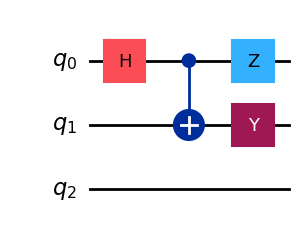

In [4]:
# Circuit with idle gaps
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0, 1)

qc.y(1)
qc.z(0)

print("Original circuit:")
qc.draw('mpl')

In [5]:
# Run DD
value = run_dd(
    qc,
    executor,
    sequence=xx,
    trials=3,
)

print("DD mitigated value:", value)


DD mitigated value: (np.float64(-0.9349999999999999), [array(-0.925), array(-0.947), array(-0.933)])



Circuit with DD inserted:


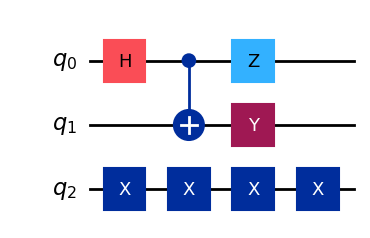

In [6]:
# Insert DD (for visualization)
qc_dd = insert_dd_sequences(qc, xx)

print("\nCircuit with DD inserted:")
qc_dd.draw("mpl")
